![Astrofisica Computacional](../logo.PNG)

---
## 01. Root Search


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this Notebook

This notebook describes some of the techniques for finding the roots of a function numerically.

---

On many occasions, it is necessary to find the roots of a function, i.e. those values ​​of the independent variable $x_r$ for which $f(x_r) = 0$. In general, $x_r$ can represent one or multiple variables and $f$ can be a single function or it can represent a system of equations. It is also possible that $f$ explicitly depends on $x$ or that $f$ implicitly depends on $x$.

---
## Newton-Raphson method

There are multiple methods to find the roots of a function, but the most popular of them is the **Newton-Raphson** method. To describe this technique, we must consider the Taylor series expansion of the function $f(x)$ around the root $x_r$,

\begin{equation}
f(x_r) = f(x) + (x_r - x) f'(x) + \mathcal{O}( (x_r - x)^2) \approx 0 .
\end{equation}

The value $x_r$ should be understood as the value of the root at the $n$th step in an iterative process. Therefore, in step $n+1$ of the iteration, to first order, we will have

\begin{equation}
f(x_{n+1}) = f(x_n) + (x_{n+1} - x_{n})
f'(x_n) \approx 0 ,
\end{equation}

where do we clear

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} .
\end{equation}

The implementation of this iterative procedure will stop when the fractional change between the iteration results $n$ and $n+1$ is smaller than the floating point precision (machine epsilon)

\begin{equation}
\left| \frac{[f(x_{n+1}) - f(x_{n})]}{f({x_n})} \right| < \epsilon .
\end{equation}

The convergence of the Newton-Raphson Method is second order if $f(x)$ is well behaved and if the initial value for the procedure $x_0$ is a point close to the value of the root.

Important Note: This method needs to know the analytic form of the first derivative $f'(x)$. If this is not the case, this derivative will need to be evaluated numerically and the technique will be called the **secant method**.

---
### Secant method

The secant method is similar to the Newton-Raphson method, but the first derivative $f'(x_n)$ is evaluated numerically. Usually this is evaluated with backward differences, with which the iterative process is obtained

\begin{equation}
x_{n+1} = x_{n} - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}\,\,.
\end{equation}

Note that this iterative process needs two starting points, or at least an initial value of the first derivative, i.e. $f'(x_0)$. Due to the inclusion of the numerical procedure to estimate the first derivative, the secant method converges more slowly than the Newton-Raphson method.

#### Example. Roots of a discrete function using the Newton-Raphson method (secant)

The information of the function will be read from a .txt file and the root of the function will be found numerically applying the Newton-Raphson (or secant) method. A quadratic interval interpolation will be used to model the function.

Before locating the root numerically, the behavior of the function will be displayed.

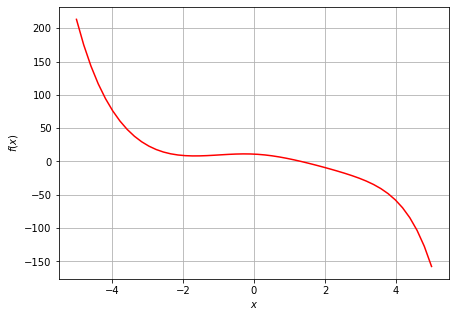

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt( 'data_points.txt', comments='#', delimiter=',')
x_data = data[:,0]
f_data = data[:,1]

plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

From the graph, it is observed that the root must be located in the interval between $x=0$ and $x=2$. Therefore we will restrict ourselves to this region:

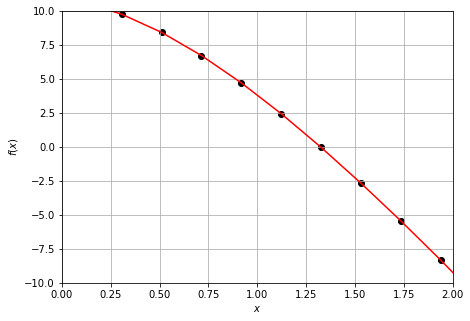

In [2]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0,2)
plt.ylim(-10,10)
plt.grid()
plt.show()

This zoom shows the interior of the interval $1<x<1.75$. We will concentrate on the three points in the middle of the interval in order to interpolate a quadratic polynomial and apply the root finding method.

In [3]:
# Find the initial and final points of the restricted interval of 
# three points to interpolate.
for i in range(len(x_data)-1):
    if x_data[i]>=1:
        a=i
        break

# The interval will include three points:
# x[a], x[a+1], x[a+2]
# Here we define the arrays that enter as arguments
# for the interpolated polynomial
x_int =[x_data[a], x_data[a+1], x_data[a+2]]
f_int =[f_data[a], f_data[a+1], f_data[a+2]]

print('a = ', a, ': x_a = ', x_data[a], ': f(x_a) = ', f_data[a])
print('a = ', 31, ': x_a = ', x_data[31], ': f(x_a) = ', f_data[31])

a =  30 : x_a =  1.12245 : f(x_a) =  2.44474
a =  31 : x_a =  1.32653 : f(x_a) =  -0.0279679


Now, we use the interpolated quadratic polynomial and use the Newton-Raphson (or secant) method.

In [4]:
# 2-order Interpolated Polynomial 
def p2(x):
    pol = (((x-x_int[1])*(x-x_int[2]))/((x_int[0]-x_int[1])*(x_int[0]-x_int[2])))*f_int[0] +\
          (((x-x_int[0])*(x-x_int[2]))/((x_int[1]-x_int[0])*(x_int[1]-x_int[2])))*f_int[1] +\
          (((x-x_int[0])*(x-x_int[1]))/((x_int[2]-x_int[0])*(x_int[2]-x_int[1])))*f_int[2]
    return pol


# Newton-Raphson Method. We begin with the value at point x[a]
root0 = x_data[a]-1e-5
root = x_data[a]

while np.abs(p2(root))>1e-10:
    new_root = root - p2(root)*(root - root0)/(p2(root) - p2(root0))
    root0, root = root, new_root

print(f'La raiz es x_r = {root:.8f}')
print(f'para la cual la función interpolada da un valor de f(x_r) =  {p2(root):.8e}')



La raiz es x_r = 1.32429525
para la cual la función interpolada da un valor de f(x_r) =  7.09501902e-16


We can visualize the location of the root,

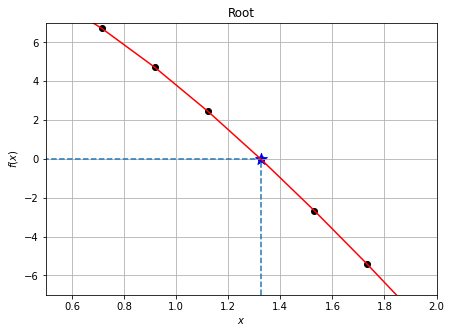

In [5]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.scatter(root, p2(root), color='blue', marker='*',s=150)
plt.vlines(root, -7, p2(root), linestyle='dashed')
plt.hlines(p2(root),0, root, linestyle='dashed')
plt.title('Root')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0.5,2)
plt.ylim(-7,7)
plt.grid()
plt.show()

---
## Bisection Method

The bisection method is based on the intermediate value theorem, which states that a continuous function $f(x)$ must have at least one root in the interval $[x_a,x_b]$ if $f(x_a)$ and
$f(x_b)$ have opposite signs.

In this way, the bisection method is implemented in the following way,

1. Two initial values ​​$x_a$ and $x_b$ are chosen such that $f(x_a)$ and $f(x_b)$ have opposite signs.

2. Calculate the midpoint $x_c = \frac{x_a+x_b}{2}$ and the value of the function there, $f(x_c)$.

3. If $f(x_c) = 0$ or
  $\left| \frac{f(x_c) - f(x_a)}{f(x_a)} \right| < \epsilon$ or $\left| \frac{f(x_c) - f(x_b)}{f(x_b)} \right| <
  \epsilon$, the root has been found.
  
  If this is not the case, then:
    * if $f(x_a)$ and $f(x_c)$ have opposite signs, then they enclose the root. We return to point (2) with $x_a=x_a$ and $x_b=x_c$.
      
    * If $f(x_c)$ and $f(x_b)$ have opposite signs, then they enclose the root. We return to point (2) with $x_a=x_c$ and $x_b=x_b$.
  

Although the bisection method is very robust and efficient, it is generally not as fast as Newton's method because it requires more iterations to find the root.


#### Example. Roots of a discrete function with the bisection method.

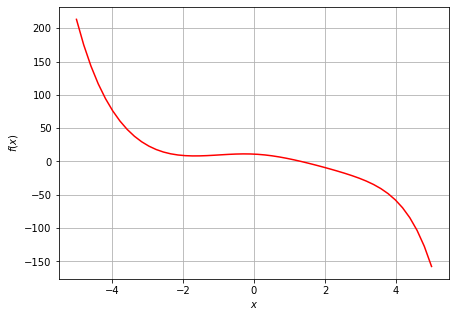

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x_data = data[:,0]
f_data = data[:,1]

plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

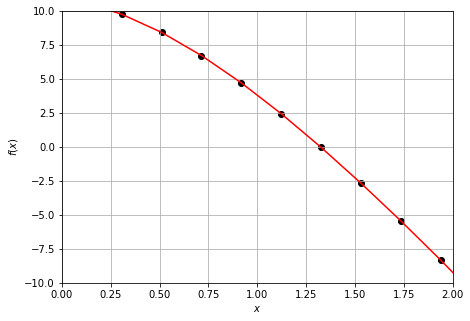

In [7]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0,2)
plt.ylim(-10,10)
plt.grid()
plt.show()

In [8]:
# Find the initial and final points of the restricted interval of 
# three pints to interpolate.
for i in range(len(x_data)-1):
    if x_data[i]>=1:
        a=i
        break

# The interval will include three points:
# x[a], x[a+1], x[a+2]
# Here we define the arrays that enter as arguments
# for the interpolated polynomial
x_int =[x_data[a], x_data[a+1], x_data[a+2]]
f_int =[f_data[a], f_data[a+1], f_data[a+2]]

print('a = ', a, ': x_a = ', x_data[a], ': f(x_a) = ', f_data[a])


a =  30 : x_a =  1.12245 : f(x_a) =  2.44474


Ahora, interpolamos el polinomio cuadrático y utilizamos el método de la bisección para encontrar la raíz.

In [9]:
# 2-order Interpolated Polynomial 
def p2(x):
    pol = (((x-x_int[1])*(x-x_int[2]))/((x_int[0]-x_int[1])*(x_int[0]-x_int[2])))*f_int[0] +\
          (((x-x_int[0])*(x-x_int[2]))/((x_int[1]-x_int[0])*(x_int[1]-x_int[2])))*f_int[1] +\
          (((x-x_int[0])*(x-x_int[1]))/((x_int[2]-x_int[0])*(x_int[2]-x_int[1])))*f_int[2]
    return pol


# Bisection Method. 
# We begin with the values at the points x_data[a] and x_data[a+2]
x_a = x_data[a]
x_b = x_data[a+2]
x_c = (x_a + x_b)/2.

while np.abs(p2(x_c)) > 1e-15:
    x_c = (x_a + x_b)/2.
    if p2(x_a)*p2(x_c) < 0:
        x_b = x_c
    else:
        x_a = x_c

root = x_c
    
print(f'La raíz es x_r = {root:.8f}')
print(f'para la cual la función interpolada da un valor de f(x_r) =  {p2(root):.8e}')



La raíz es x_r = 1.32429525
para la cual la función interpolada da un valor de f(x_r) =  7.09501902e-16
